





<h2 id='part1'>Project 1: Write A Blog (Code)</h2>



In [11]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read in data
df = pd.read_csv('./survey_results_public_P1.csv')
schema = pd.read_csv('./survey_results_schema_P1.csv')

#display the head of the dataset 
df.head() 


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# How many questions are asked? What are the questions look like? 
schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [4]:
# count the number of rows in the dataset - This shows how many respondent they got. 
num_rows=df.shape[0]
print(num_rows)

51392


In [5]:
# count the number of columes - This also shows how many questions were asked.   
num_cols=df.shape[1]
print(num_cols)

154


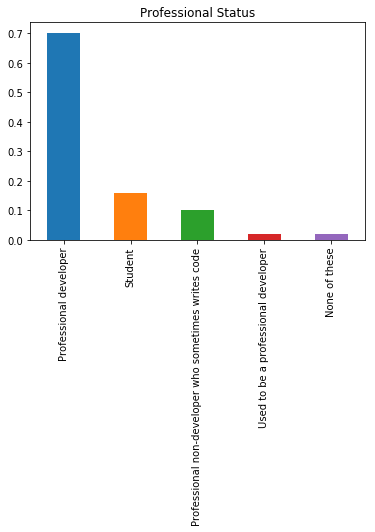

In [8]:
# What professional are they? 
professional_vals = df.Professional.value_counts()
(professional_vals/df.shape[0]).plot(kind="bar");
plt.title("Professional Status");

In [9]:
# how many countries? how does the country profile look like? 
country_vals = df.Country.value_counts()
print(country_vals)

United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
France                             1740
Poland                             1290
Australia                           913
Russian Federation                  873
Spain                               864
Netherlands                         855
Italy                               781
Brazil                              777
Sweden                              611
Switzerland                         595
Israel                              575
Romania                             561
Iran                                507
Austria                             477
Pakistan                            454
Czech Republic                      411
Belgium                             404
South Africa                        380
Turkey                              363
Ukraine                             356


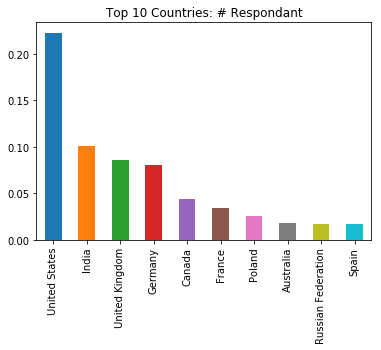

In [12]:
# Plot the bar chart of the top 10 countries 
(country_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Top 10 Countries: # Respondents");


In [6]:
# calculate the average salary for other countries
salary_mean=df.Salary[df['Country']!='United States'].mean()
print(salary_mean)

39739.9941453


In [7]:
# calculate the median salary for the world
salary_median=df.Salary[df['Country']!='United States'].median()
print(salary_median)

37634.4086022


In [4]:
# calculate the average salary for US
salary_mean_US=df.Salary[df['Country']=='United States'].mean()
print(salary_mean_US)

96194.7546349


In [9]:
# calculate the medium salary for US
salary_median_US=df.Salary[df['Country']=='United States'].median()
print(salary_median_US)

93000.0


In [4]:
# averaqge career satisfaction of us developers
df.CareerSatisfaction[df['Country']=='United States'].mean()

7.6504254457050243

In [26]:
# max and min for salary
df.groupby(['Respondent']).mean()['Salary'].sort_values(ascending=False).dropna()

Respondent
31601    197000.000000
27944    195000.000000
6744     195000.000000
41399    195000.000000
1697     195000.000000
18238    195000.000000
32623    194000.000000
6718     193750.000000
30551    193000.000000
14364    192000.000000
2371     192000.000000
39065    190000.000000
6595     190000.000000
44320    190000.000000
22318    190000.000000
1353     190000.000000
17573    190000.000000
39223    190000.000000
14783    188000.000000
14799    187500.000000
9937     187200.000000
48609    187000.000000
12757    185000.000000
42182    185000.000000
15964    185000.000000
221      185000.000000
39191    185000.000000
46889    185000.000000
2139     185000.000000
43990    184000.000000
             ...      
48163         7.000000
35442         6.774950
28432         6.354249
24425         5.000000
40053         3.086991
11868         2.179837
46170         1.744186
43492         1.715774
43929         1.515152
7079          1.495774
8155          0.757576
46744         0.660696


In [23]:
# median career satisfaction of us deveopers 
df.CareerSatisfaction[df['Country']=='United States'].median()

8.0

In [24]:
# averaqge career satisfaction of us developers
df.CareerSatisfaction[df['Country']!='United States'].mean()

7.1953508210705905

In [25]:
# averaqge career satisfaction of us developers
df.CareerSatisfaction[df['Country']!='United States'].median()

7.0

In [21]:
# max and min for career satisfaction
df.groupby(['Respondent']).mean()['CareerSatisfaction'].sort_values(ascending=False).dropna()

Respondent
30157    10.0
15973    10.0
45800    10.0
34572    10.0
45804    10.0
32327    10.0
7451     10.0
45807    10.0
15990    10.0
7447     10.0
7446     10.0
15991    10.0
15992    10.0
15994    10.0
34578    10.0
26930    10.0
7430     10.0
16005    10.0
7407     10.0
26938    10.0
16019    10.0
45835    10.0
26958    10.0
15975    10.0
45797    10.0
26907    10.0
26924    10.0
7549     10.0
15928    10.0
45758    10.0
         ... 
20555     0.0
38046     0.0
36740     0.0
31277     0.0
15910     0.0
36712     0.0
2308      0.0
13546     0.0
9107      0.0
30682     0.0
26105     0.0
39970     0.0
29792     0.0
36629     0.0
49676     0.0
44894     0.0
11017     0.0
26023     0.0
11024     0.0
39937     0.0
22426     0.0
47156     0.0
9047      0.0
23899     0.0
33011     0.0
35481     0.0
28603     0.0
2201      0.0
16022     0.0
47290     0.0
Name: CareerSatisfaction, Length: 42695, dtype: float64

In [12]:
# average job satisfaction for US developers
df.JobSatisfaction[df['Country']=='United States'].mean()

7.1785024672816995

In [14]:
# median job satisfaction for US developers 
df.JobSatisfaction[df['Country']=='United States'].median()

8.0

In [15]:
# average job satisfaction for non US developers
df.JobSatisfaction[df['Country']!='United States'].mean()

6.8906099053262055

In [16]:
# median job satisfaction for non US developers 
df.JobSatisfaction[df['Country']!='United States'].median()

7.0

In [19]:
# max and min for job satisfaction 
df.groupby(['Respondent']).mean()['JobSatisfaction'].sort_values(ascending=False).dropna()

Respondent
36976    10.0
46257    10.0
21867    10.0
8036     10.0
37928    10.0
37926    10.0
21905    10.0
8009     10.0
21938    10.0
21940    10.0
21959    10.0
7982     10.0
7978     10.0
21963    10.0
37890    10.0
21964    10.0
21967    10.0
7963     10.0
37886    10.0
21860    10.0
8044     10.0
21824    10.0
21738    10.0
8160     10.0
38006    10.0
21725    10.0
21726    10.0
8124     10.0
8123     10.0
21728    10.0
         ... 
19351     0.0
46076     0.0
43674     0.0
33038     0.0
22006     0.0
8358      0.0
16885     0.0
23925     0.0
31882     0.0
43681     0.0
30986     0.0
24977     0.0
7349      0.0
28603     0.0
50081     0.0
38477     0.0
30220     0.0
17649     0.0
4113      0.0
14174     0.0
19957     0.0
23899     0.0
11132     0.0
32009     0.0
51092     0.0
38990     0.0
30232     0.0
34376     0.0
8310      0.0
34671     0.0
Name: JobSatisfaction, Length: 40376, dtype: float64